
<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

Informática II

 </center></font></h1>
<h2><font color='0B5345'> <center>
Parcial II: Computación numérica en python</center></font></h2>
<font  face="Courier New" size="3">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>




Nombre: Pablo Andrés Aristizábal Castaño

Cédula: 1040872516


Antes de iniciar leer cuidadosamente cada enunciado antes de responder y asegurarse de comprender completamente lo que se está solicitando. 

¡Buena suerte!

1. (50%) La electromiografía (EMG) es una técnica ampliamente utilizada en medicina y fisiología para estudiar la actividad eléctrica de los músculos. Esta actividad, conocida como electromiograma (EMG), se registra mediante electrodos colocados sobre la piel o dentro del músculo, y proporciona información valiosa sobre el funcionamiento del sistema neuromuscular.

Instrucciones:

Utilizando programación orientada a objetos, cargue dos archivos de señales de EMG que contenga datos de varios electrodos (canales).

- Cree un método que muestre la información de la señal, que describa la forma de la señal y sus dimensiones (ejemplo: número de puntos de tiempo y el número de canales)

- Defina un método que sea capaz de graficar cada par de canales de EMG en un subplot con un tamaño adecuado. El número de canales es par, por lo tanto debe organizar los subplots en una matriz de dimensiones (numerodecanales/2, numerodecanales/2). Cada canal debe tener un color distinto en el gráfico.

- Los gráficos deben tener títulos, labels, cuadrícula, nombres en los ejes y cambios en el grosor de la línea.
- Debe permitir al usuario ingresar los límites del eje x a graficar.
- En este caso el gráfico es datos vs tiempo

- Defina un método que identifique y muestre la información del valor máximo de amplitud de la señal por cada canal y archivo.

- Cree un método adicional que grafique una señal que represente el promedio de todos los canales de un archivo. Esta señal promedio debe tener un estilo de línea diferente y estar en un gráfico separado.

Datos cargados exitosamente.
La señal 1 tiene 8 canales y tiene 63196 puntos de tiempo
La señal 2 tiene 8 canales y tiene 57974 puntos de tiempo


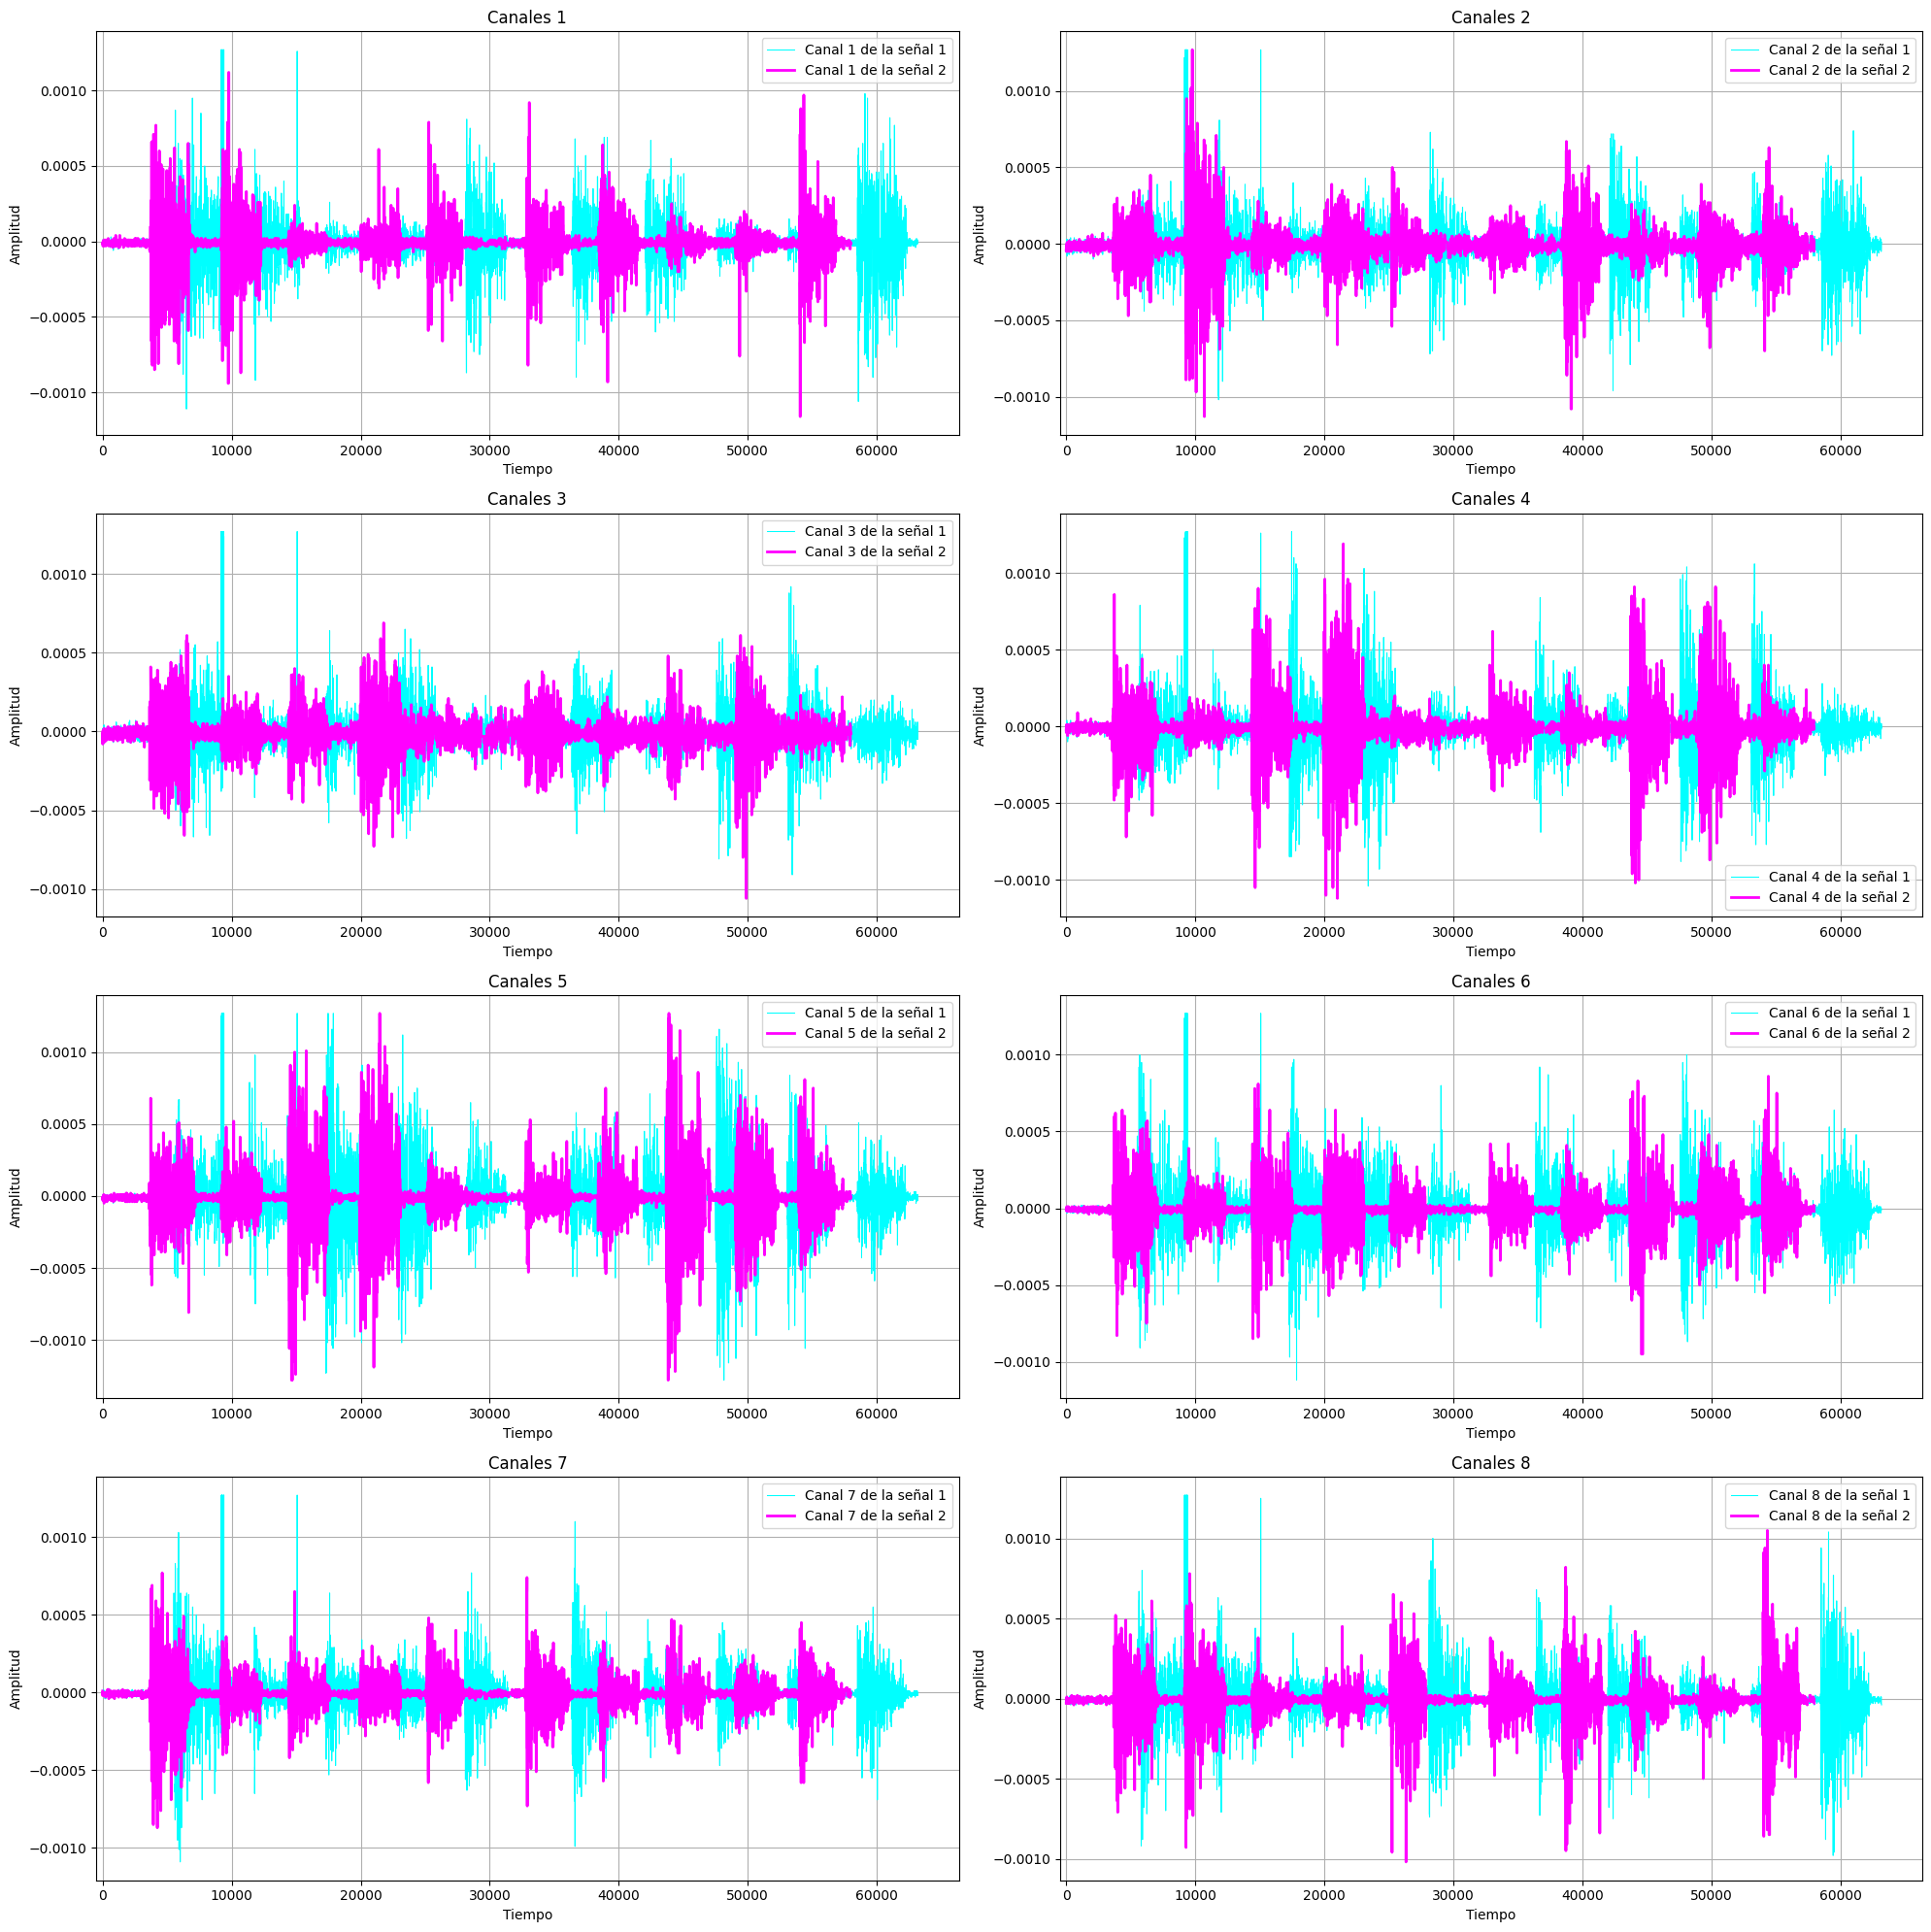

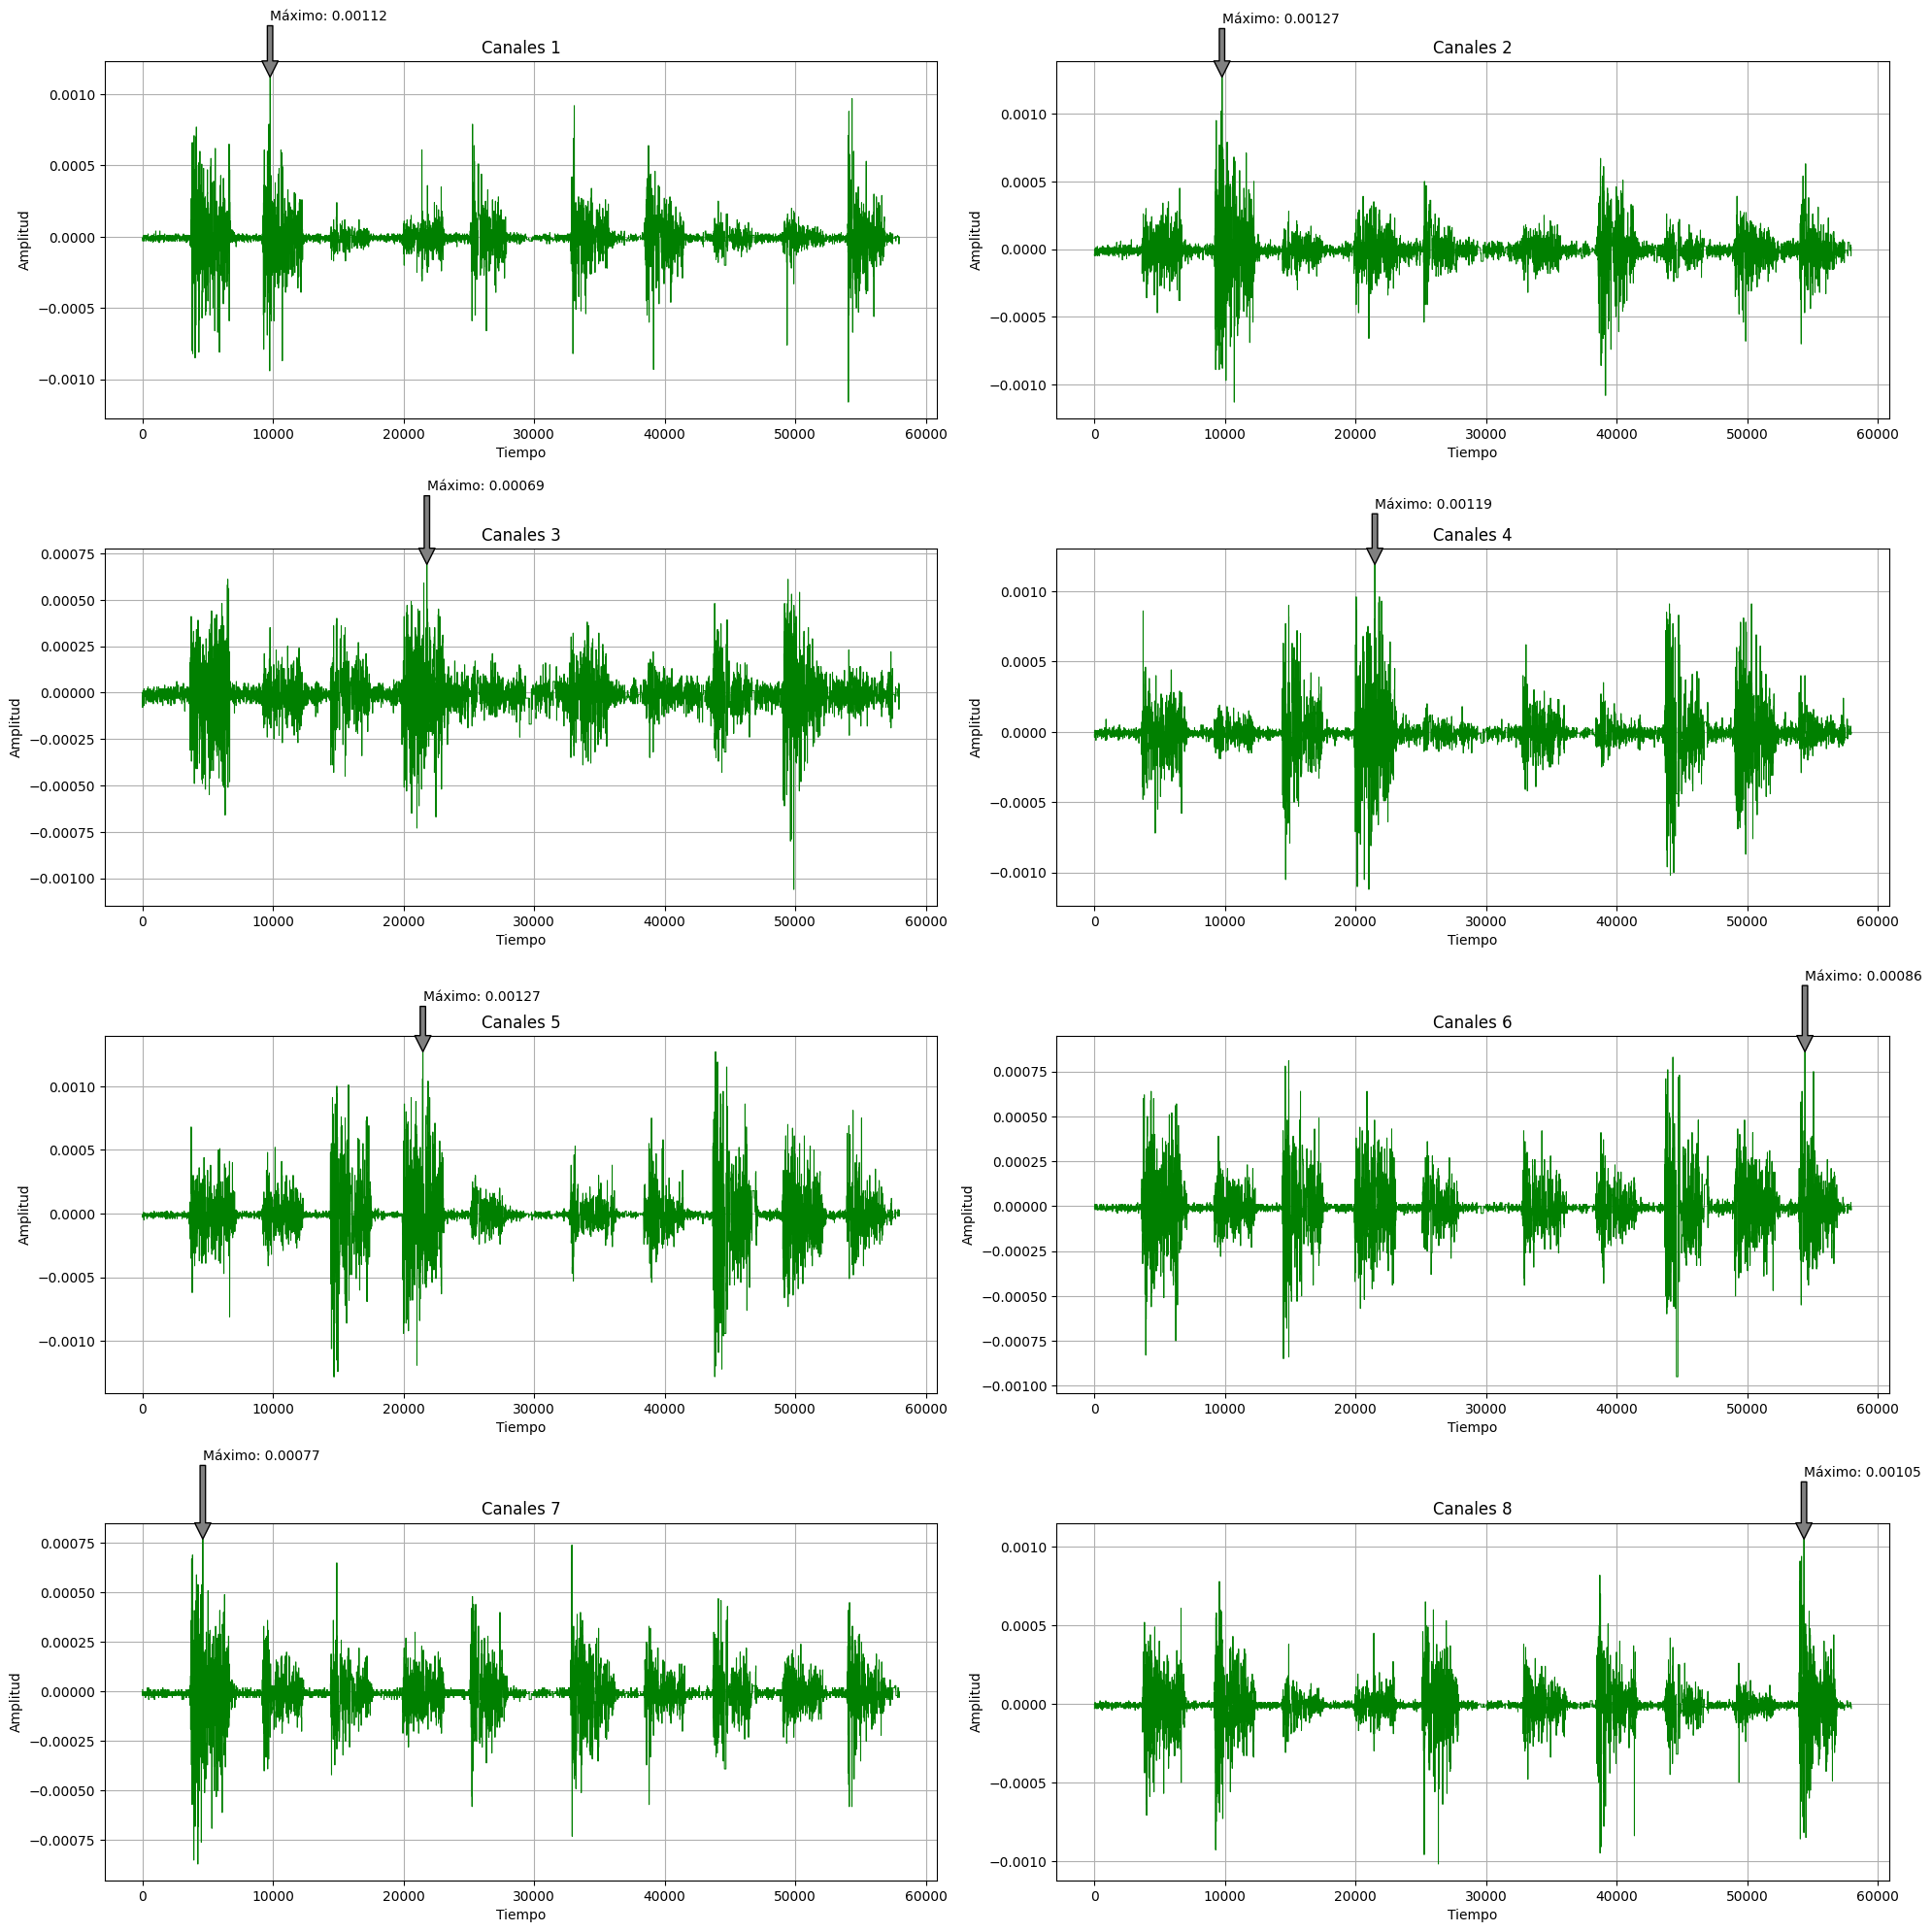

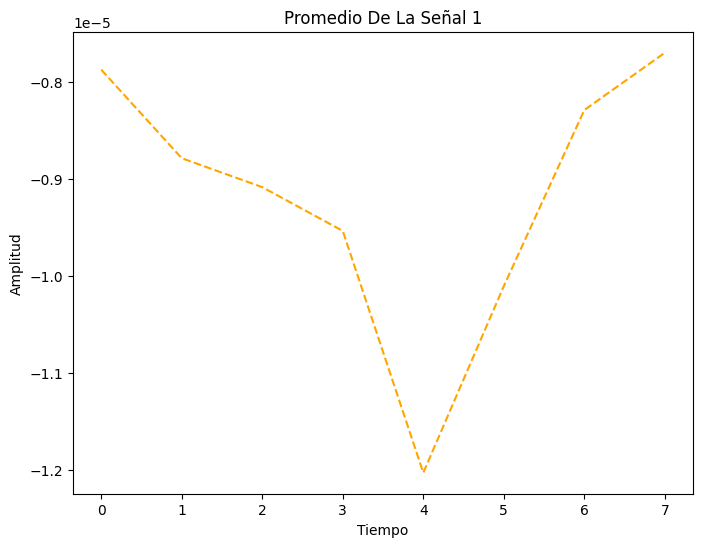

In [2]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import pandas as pd
class AnalisisEMG:
    def __init__(self):
        self.num_canales1=None
        self.tiemo1=None
        self.num_canales2=None
        self.tiemo2=None
    def cargarDatos(self, archivo1, archivo2):
        self.data1 = sio.loadmat(archivo1)
        self.data1 = self.data1[list(self.data1.keys())[-1]]
        self.num_canales1 = self.data1.shape[0]
        self.tiempo1 = self.data1.shape[1]
        self.data2 = sio.loadmat(archivo2)
        self.data2 = self.data2[list(self.data2.keys())[-1]]
        self.num_canales2 = self.data2.shape[0]
        self.tiempo2 = self.data2.shape[1]
        print("Datos cargados exitosamente.")    
    def informacionSenal(self):
        print(f'La señal 1 tiene {self.num_canales1} canales y tiene {self.tiempo1} puntos de tiempo')
        print(f'La señal 2 tiene {self.num_canales2} canales y tiene {self.tiempo2} puntos de tiempo')
    def visualizarTodo(self,limiteIzquierdo=-500,limiteDerecho=None):       
        plt.figure(figsize=(20,20))
        posicion1=len(self.data1)*50
        for i in range(len(self.data1)):
            posicion=posicion1+21+i
            plt.subplot(posicion)
            plt.title(f'Canales {i+1}')
            plt.plot(self.data1[i], label=f'Canal {i+1} de la señal 1', color='cyan',linewidth=0.75)
            plt.plot(self.data2[i], label=f'Canal {i+1} de la señal 2', color='magenta',linewidth=2)           
            plt.legend()
            plt.ylabel('Amplitud')
            plt.xlabel('Tiempo')
            plt.grid(True)
            plt.xlim(limiteIzquierdo,limiteDerecho)
        plt.tight_layout()
        plt.show
    def maximo(self, senal):
        if senal==1:
            plt.figure(figsize=(20,20))
            posicion1=len(self.data1)*50
            for i in range(len(self.data1)):
                indice_maximo = np.argmax(self.data1[i])
                valor_maximo = np.max(self.data1[i])
                posicion=posicion1+21+i
                plt.subplot(posicion)
                plt.title(f'Canales {i+1}')
                plt.plot(self.data1[i], label=f'Canal {i+1} de la señal 1', color='yellow',linewidth=0.75)          
                plt.ylabel('Amplitud')
                plt.xlabel('Tiempo')
                plt.annotate(f'Máximo: {valor_maximo}', 
                            xy=(indice_maximo, valor_maximo), 
                            xytext=(indice_maximo, valor_maximo + 0.0004),
                            arrowprops=dict(facecolor='gray', shrink=1.5))
                plt.grid(True)
                plt.tight_layout()
                plt.show
        if senal==2:
            plt.figure(figsize=(20,20))
            posicion1=len(self.data2)*50
            for i in range(len(self.data2)): 
                indice_maximo = np.argmax(self.data2[i])
                valor_maximo = np.max(self.data2[i])
                posicion=posicion1+21+i
                plt.subplot(posicion)
                plt.title(f'Canales {i+1}')
                plt.plot(self.data2[i], label=f'Canal {i+1} de la señal 1', color='green',linewidth=0.75)          
                plt.ylabel('Amplitud')
                plt.xlabel('Tiempo')
                plt.annotate(f'Máximo: {valor_maximo}', 
                            xy=(indice_maximo, valor_maximo), 
                            xytext=(indice_maximo , valor_maximo + 0.0004),
                            arrowprops=dict(facecolor='gray', shrink=1.5))
                plt.grid(True)
                plt.tight_layout()
                plt.show
    def promedio(self,senal):
        if senal==1:
            pd_data1=pd.DataFrame(self.data1)
            promedio=pd_data1.mean(axis=1)
            plt.figure(figsize=(8,6))
            plt.title('Promedio De La Señal 1')
            plt.ylabel('Amplitud')
            plt.xlabel('Tiempo')
            plt.subplot(111)
            plt.plot(promedio, color='orange', linestyle='--')
            plt.show
        if senal==2:
            pd_data2=pd.DataFrame(self.data2)
            promedio=pd_data2.mean(axis=1)
            plt.figure(figsize=(8,6))
            plt.title('Promedio De La Señal 2')
            plt.ylabel('Amplitud')
            plt.xlabel('Tiempo')
            plt.subplot(111)
            plt.plot(promedio, color='red', linestyle=':')
            plt.show
analisis = AnalisisEMG()
analisis.cargarDatos(r'C:\Users\Pablo\Informática ll\git.repositorio\Inform-tica-ll\Unidad 2\Parcial II\archivo1.mat',r'C:\Users\Pablo\Informática ll\git.repositorio\Inform-tica-ll\Unidad 2\Parcial II\archivo2.mat')
analisis.informacionSenal()
analisis.visualizarTodo()
analisis.maximo(2)
analisis.promedio(1)

2. (20%) Utilice la librería NumPy para generar una serie de señales sinusoidales con las siguientes características:

- **Frecuencia de la señal: 1 Hz.**
- **Número de muestras: 1000.**
- **Rango de amplitud: entre 1 y 5 unidades.**

Genere un total de 5 señales sinusoidales, cada una con una amplitud aleatoria dentro del rango especificado.

Utilice la librería Matplotlib para graficar las 5 señales sinusoidales en una misma figura y cada señal debe estar etiquetada con su respectiva amplitud en la leyenda.

Incluya etiquetas adecuadas en los ejes x e y de la figura, así como un título descriptivo.

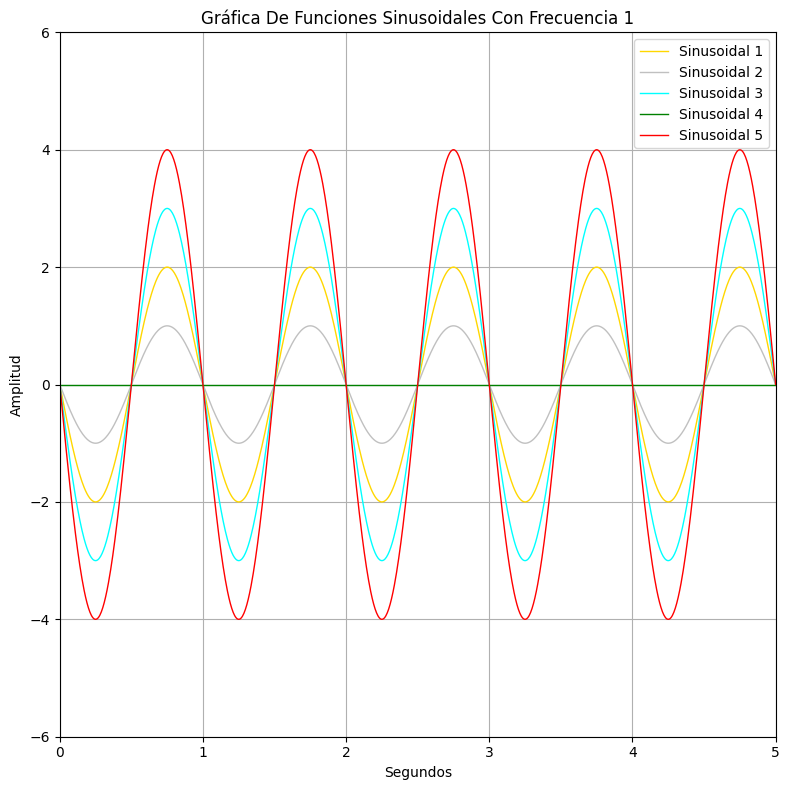

In [39]:
import numpy as np
import matplotlib.pyplot as plt
random1=np.random.randint(-4,4)
random2=np.random.randint(-4,4)
random3=np.random.randint(-4,4)
random4=np.random.randint(-4,4)
random5=np.random.randint(-4,4)
intervalo=np.linspace(0,5,1000)
yn1=np.sin(np.pi*2*intervalo)*random1
yn2=np.sin(np.pi*2*intervalo)*random2
yn3=np.sin(np.pi*2*intervalo)*random3
yn4=np.sin(np.pi*2*intervalo)*random4
yn5=np.sin(np.pi*2*intervalo)*random5
fig,ax=plt.subplots(figsize=(8,8))
ax.plot(intervalo,yn1,label='Sinusoidal 1',color='gold',linewidth=(1)) 
ax.plot(intervalo,yn2,label='Sinusoidal 2',color='silver',linewidth=(1))
ax.plot(intervalo,yn3,label='Sinusoidal 3',color='cyan',linewidth=(1))
ax.plot(intervalo,yn4,label='Sinusoidal 4',color='green',linewidth=(1))
ax.plot(intervalo,yn5,label='Sinusoidal 5',color='red',linewidth=(1))
ax.set_xlabel('Segundos')
ax.set_ylabel('Amplitud') 
ax.set_title('Gráfica De Funciones Sinusoidales Con Frecuencia 1')  
ax.set_ylim(-6,6)
ax.set_xlim(0,5)
plt.tight_layout()
ax.grid(True)
ax.legend()

3. (30%) Cargue el conjunto de datos de dispositivos médicos desde el archivo CSV 'datos_dispositivos.csv' utilizando la biblioteca Pandas.
Realice un análisis exploratorio de los datos utilizando métodos y funciones de Pandas: 

- Muestre las primeras filas del DataFrame para entender su estructura.
- Verifique la información básica del DataFrame, como el número de filas y columnas, los tipos de datos de cada columna y la presencia de valores nulos.
- Filtre el dataframe según la clasificación de riesgo de los dispositivos y cree un nuevo dataframe para cada uno de ellos.
- Por medio de filtros y métodos de pandas identifique los diferentes fabricantes de los dispositivos de la bases de datos y cuantos dispositivos corresponden a cada uno de los fabricantes.

**Éxitos y recuerden que la entrega del parcial se realiza subiendo este notebook a su repositorio de github.**

In [40]:
import pandas as pd
import numpy as np
dispositivos=pd.read_csv(r"C:\Users\Pablo\Informática ll\git.repositorio\Inform-tica-ll\Unidad 2\Parcial II\datos_dispositivos.csv")
print(dispositivos.size)
print(dispositivos.shape)
print(dispositivos.columns)
dispositivos

120
(30, 4)
Index(['ID', 'Nombre_dispositivo', 'Fabricante', 'Clasificacion_riesgo'], dtype='object')


,ID,Nombre_dispositivo,Fabricante,Clasificacion_riesgo
0,1,Monitor de signos vitales,MedTech,Bajo
1,2,Desfibrilador,LifeCare,Moderado
2,3,Electrocardiograma,CardioTech,Alto
3,4,Respirador,RespiraCorp,Bajo
4,5,Bomba de infusión,InfuseCo,Moderado
5,6,Monitor de gases en sangre,CardioTech,Alto
6,7,Bomba de insulina intravenosa,CardioTech,Alto
7,8,Monitor de ritmo cardíaco,CardioTech,Bajo
8,9,Monitor de signos vitales neonatal,MedTech,Bajo
9,10,Monitor de gases en sangre,RespiraCorp,Bajo


In [41]:
riesgos=pd.DataFrame(dispositivos['Clasificacion_riesgo'])
riesgoBajo=dispositivos[dispositivos['Clasificacion_riesgo']=='Bajo']
riesgoModerado=dispositivos[dispositivos['Clasificacion_riesgo']=='Moderado']
riesgoAlto=dispositivos[dispositivos['Clasificacion_riesgo']=='Alto']

In [43]:
# dispositivos['Fabricante'].values
fabricantes=[]
for i in dispositivos['Fabricante'].values:
    if i in fabricantes:
        pass
    else:
        fabricantes.append(i)
print(fabricantes)
MedTech=dispositivos[dispositivos['Fabricante']=='MedTech']
LifeCare=dispositivos[dispositivos['Fabricante']=='LifeCare']
CardioTech=dispositivos[dispositivos['Fabricante']=='CardioTech']
RespiraCorp=dispositivos[dispositivos['Fabricante']=='RespiraCorp']
InfuseCo=dispositivos[dispositivos['Fabricante']=='InfuseCo']
print(f"""Los fabricantes actuales son {fabricantes} y tienen respectivamente:
      {fabricantes[0]}:   {dispositivos[dispositivos['Fabricante']==fabricantes[0]].shape[0]} dispositivos médicos
      {fabricantes[1]}:   {dispositivos[dispositivos['Fabricante']==fabricantes[1]].shape[0]} dispositivos médicos
      {fabricantes[2]}:   {dispositivos[dispositivos['Fabricante']==fabricantes[2]].shape[0]} dispositivos médicos
      {fabricantes[3]}:   {dispositivos[dispositivos['Fabricante']==fabricantes[3]].shape[0]} dispositivos médicos
      {fabricantes[4]}:   {dispositivos[dispositivos['Fabricante']==fabricantes[4]].shape[0]} dispositivos médicos""")


['MedTech', 'LifeCare', 'CardioTech', 'RespiraCorp', 'InfuseCo']
Los fabricantes actuales son ['MedTech', 'LifeCare', 'CardioTech', 'RespiraCorp', 'InfuseCo'] y tienen respectivamente:
      9 dispositivos médicos
      LifeCare:   7 dispositivos médicos
      CardioTech:   9 dispositivos médicos
      RespiraCorp:   3 dispositivos médicos
      InfuseCo:   2 dispositivos médicos
